In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('df8.csv')






In [6]:
#Identify the non-senstive Columns

import pandas as pd


quasi_identifiers = ['race', 'gender', 'age']
sensitive_attributes = ['diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'readmitted']

# Get all column names in the DataFrame
all_columns = df.columns.tolist()

# Identify columns that are neither quasi-identifiers nor sensitive attributes
other_columns = [col for col in all_columns if col not in quasi_identifiers + sensitive_attributes]

print("Other columns:", other_columns)

def detect_attribute_types(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    return categorical_columns, numerical_columns

categorical_columns, numerical_columns = detect_attribute_types(df)


# Print the categorical columns and numerical columns within the non-sensitive columns
categorical_other_columns = [col for col in other_columns if col in categorical_columns]
numerical_other_columns = [col for col in other_columns if col in numerical_columns]

print("Categorical other columns:", categorical_other_columns)
print("Numerical other columns:", numerical_other_columns)




Other columns: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Categorical other columns: ['discharge_disposition_id', 'admission_source_id', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyb

In [7]:
# Define categorical and numerical columns
categorical_columns = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
                       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                       'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
                       'change', 'diabetesMed']

numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Add noise through the Local Differencial Privacy Machanism

def add_laplace_noise(column, sensitivity, epsilon):
    """
    Add Laplace noise to a numerical column.
    
    Parameters:
    - column: Original numerical column.
    - sensitivity: Sensitivity of the function applied to the column (e.g., maximum difference between any two values).
    - epsilon: Privacy budget parameter.
    
    Returns:
    - Noisy column after adding Laplace noise.
    """
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale, size=column.shape)
    return column + noise

def add_randomized_response(value, categories, p=0.5):
    """
    Apply randomized response to a categorical value.
    
    Parameters:
    - value: Original categorical value.
    - categories: List of unique categories in the column.
    - p: Probability parameter for randomized response.
    
    Returns:
    - Noisy value after applying randomized response.
    """
    if np.random.random() < p:
        return value  # Keep the original value
    else:
        return np.random.choice(categories)  # Replace with a random value from the category

def add_noise_to_df(df, categorical_columns, numerical_columns, epsilon):
    """
    Add noise to a DataFrame based on local differential privacy.
    
    Parameters:
    - df: Original DataFrame.
    - categorical_columns: List of categorical columns.
    - numerical_columns: List of numerical columns.
    - epsilon: Privacy budget parameter.
    
    Returns:
    - DataFrame with noise added.
    """
    noisy_df = df.copy()
    
    for column in numerical_columns:
        sensitivity = df[column].max() - df[column].min()
        noisy_df[column] = add_laplace_noise(df[column], sensitivity, epsilon)
    
    for column in categorical_columns:
        categories = df[column].unique()
        noisy_df[column] = df[column].apply(lambda x: add_randomized_response(x, categories))
    
    return noisy_df


epsilon = 2.0  # Example epsilon value
df_noisy= add_noise_to_df(df, categorical_columns, numerical_columns, epsilon)
print(df_noisy)


                   race  gender       age  admission_type_id  \
0             Caucasian  Female    [0-40)                  0   
1             Caucasian  Female    [0-40)                  1   
2       AfricanAmerican  Female    [0-40)                  1   
3             Caucasian    Male    [0-40)                  0   
4             Caucasian    Male   [40-60)                  1   
...                 ...     ...       ...                ...   
101758  AfricanAmerican    Male   [60-80)                  1   
101759  AfricanAmerican  Female  [80-100)                  0   
101760        Caucasian    Male   [60-80)                  1   
101761        Caucasian  Female  [80-100)                  1   
101762        Caucasian    Male   [60-80)                  1   

       discharge_disposition_id admission_source_id  time_in_hospital  \
0                       Unknown            Referral         -7.100594   
1                          Home             Unknown          7.132925   
2           

In [62]:
df_noisy.to_csv('df-noisy8.csv', index=False)

print("Noisy Version of Data saved as df_noisy.csv")

Noisy Version of Data saved as df_noisy.csv


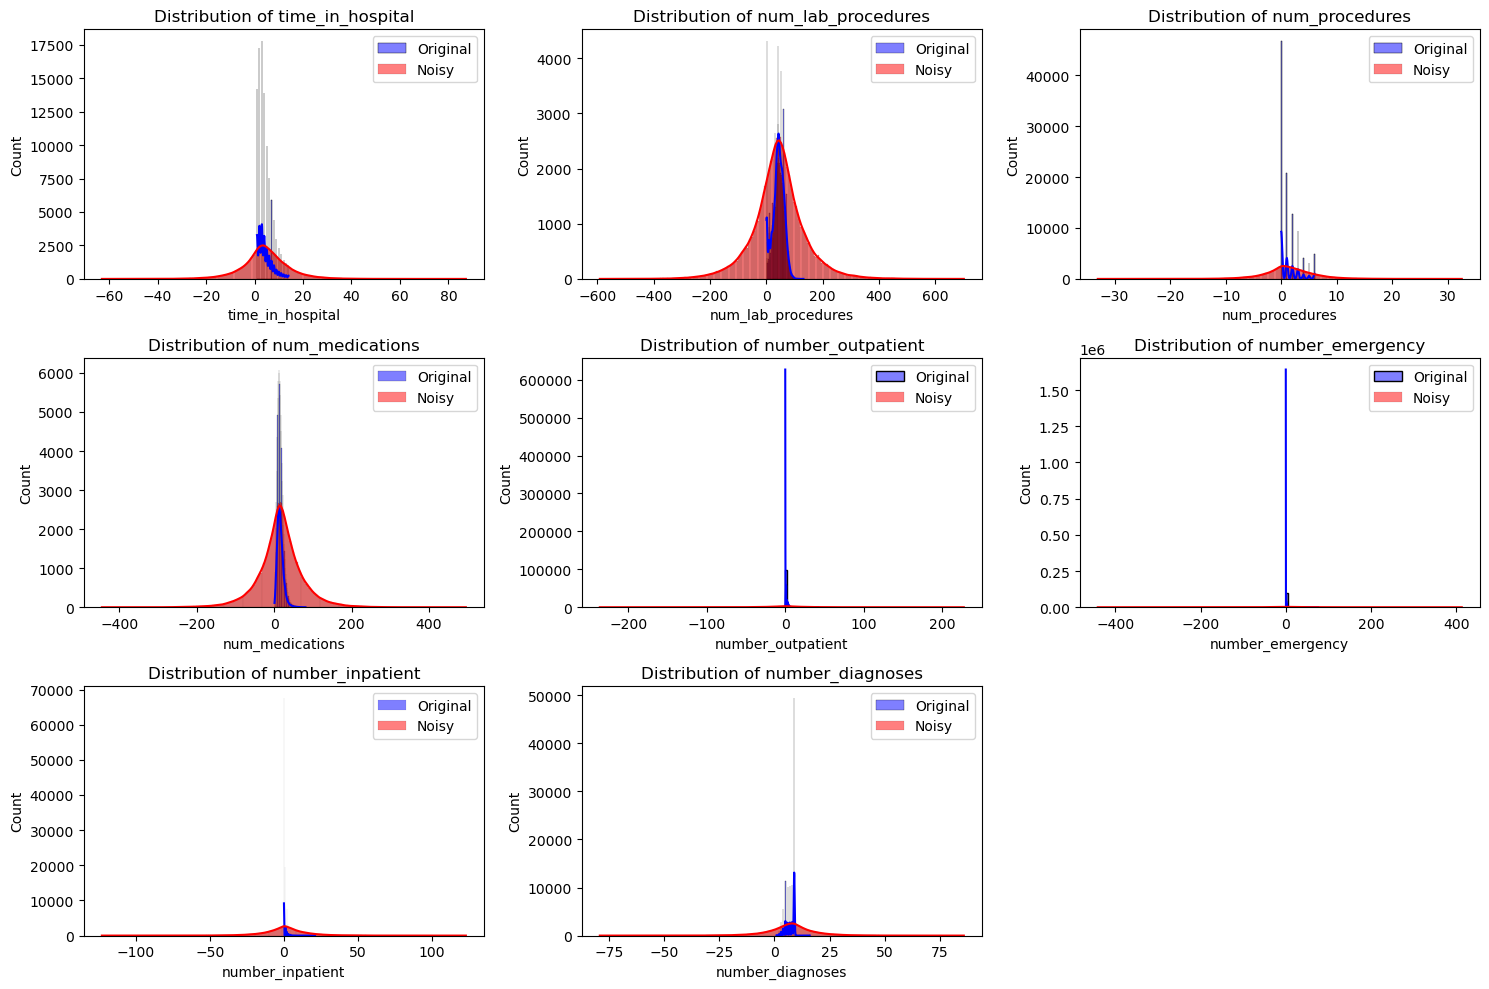

In [57]:
#Data visualisation for compareing the data distribution in numerical attributes between the original data and data after adding the noises

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(df_noisy[col], kde=True, color='red', alpha=0.5, label='Noisy')
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()


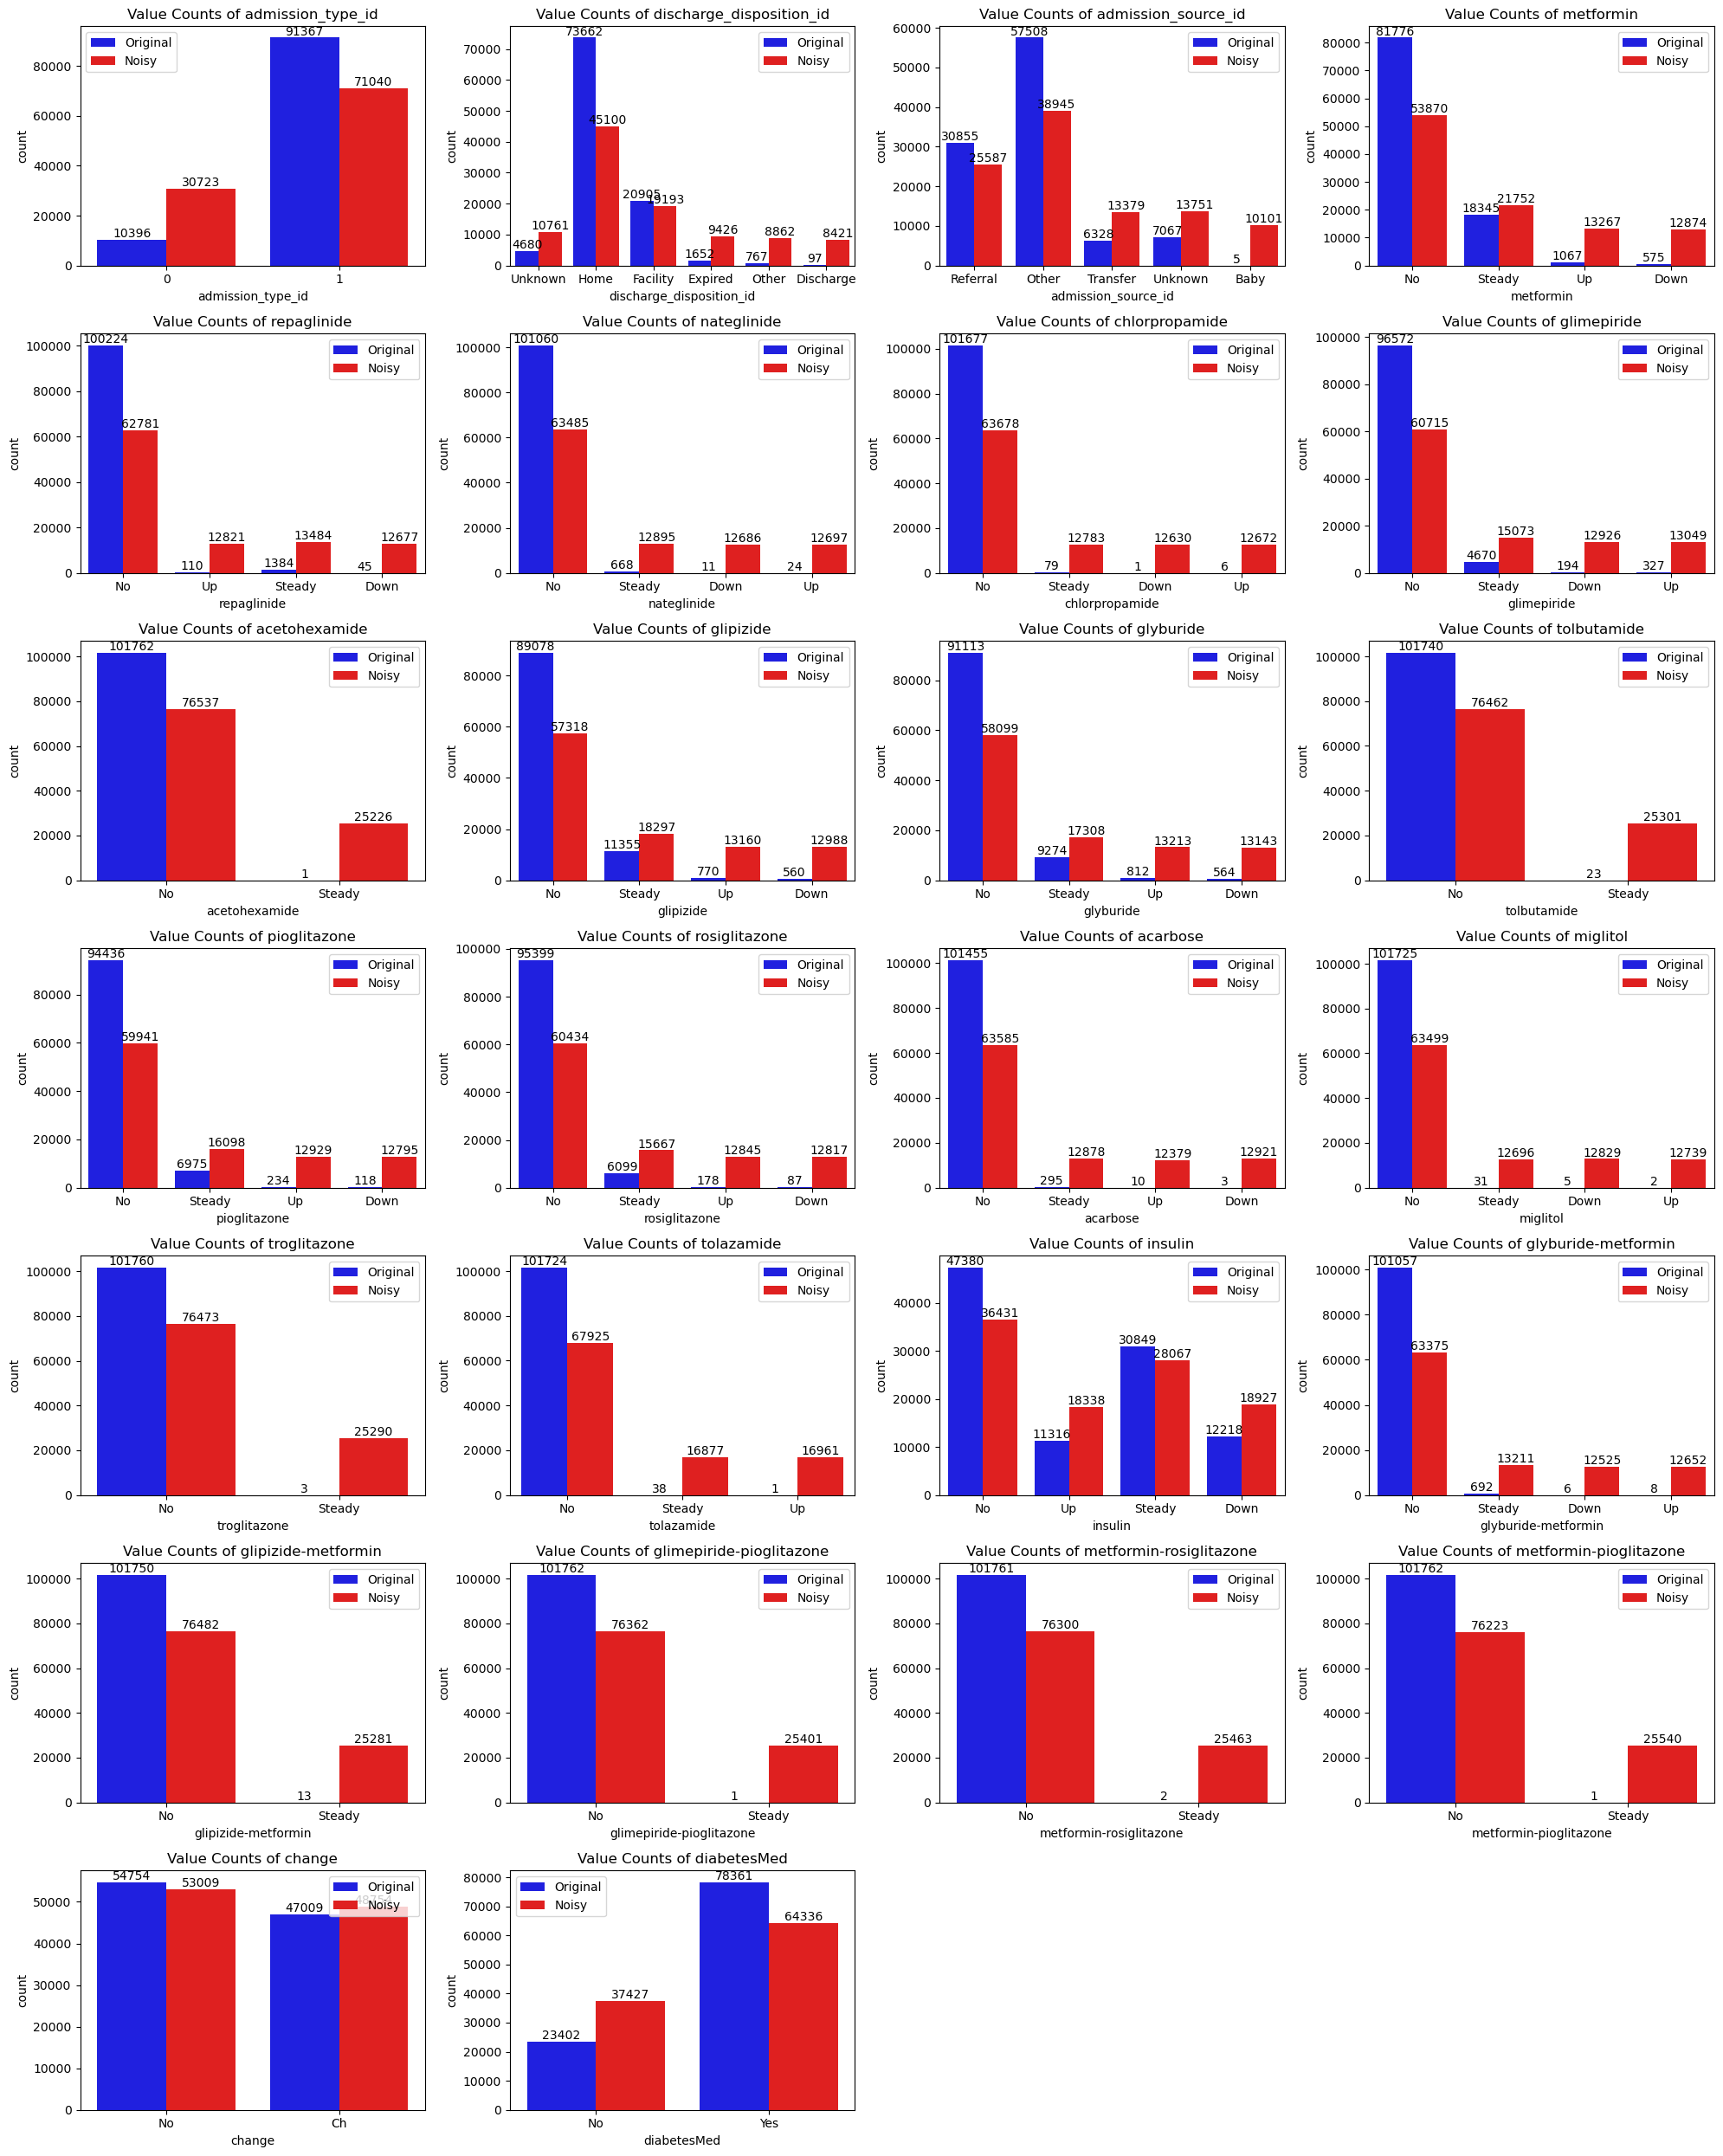

In [58]:
#Data visualisation for compareing the data distribution in Categorical attributes between the original data and data after adding the noises



# Concatenate the dataframes to facilitate side-by-side comparison
df['Dataset'] = 'Original'
df_noisy['Dataset'] = 'Noisy'
df_combined = pd.concat([df, df_noisy])

# Plotting
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(7, 4, i)
    ax = sns.countplot(data=df_combined, x=col, hue='Dataset', palette={'Original': 'blue', 'Noisy': 'red'})
    plt.title(f'Value Counts of {col}')
    plt.legend()

    # Adding count annotations
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
